In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

pd.options.display.precision = 4 # Para 4 decimales.

# Introducción

En un laboratorio se llevó a cabo un experimento bajo distintas condiciones para determinar la influencia que el nivel de temperatura y la naturaleza ácida de cierto caldo de cultivo tienen sobre el crecimiento de una población de bacterias.

En este documento se plantea, se ajusta y se analiza un modelo de regresión lineal a partir de los resultados del experimento tomando como respuesta al número final de bacterias después de 48 horas de una población inicial de 1000 y como regresores a los factores de Temperatura (30 ºC, 60 ºC o 90 ºC), tipo de Cultivo (Básico o Ácido) y Concentración (Baja o Alta) con el propósito de obtener conclusiones sobre los resultados del experimento realizado.

A continuación se muestran algunas entradas del conjunto de datos considerado.

In [8]:
df = pd.read_csv("bacterias.csv")
sample = (df.sample(5)) # El head se ve muy aburrido
sample = sample.style.set_caption(f"Tabla 1. Muestra aleatoria del conjunto de datos")
display(sample)

,Temperatura [ºC],Cultivo,Concentración,Número final de bacterias
45,90,Básico,Alta,96
3,30,Básico,Baja,94
19,30,Ácido,Alta,99
14,30,Ácido,Baja,101
56,90,Ácido,Alta,98


In [9]:
categorical = ["Temperatura [ºC]", "Cultivo", "Concentración"]
y = "Número final de bacterias"

# 1. Describa los datos gráficamente.

Como los factores de interés son `Temperatura` (30 ºC, 60 ºC o 90 ºC) y `Cultivo` (Básico o Ácido), se considera un total de 6 tratamientos distintos, cada uno con dos niveles de `Concentración` (Baja o Alta). En la Figura 1. se encuentran las gráficas de caja y brazo (*boxplots* en inglés) para cada uno de los tratamientos considerados. En el eje vertical se encuentra el `Número final de bacterias`, es decir, la respuesta, y en el eje horizontal se encuentran todos los tratamientos tratamientos considerados junto con una descripción de los parámetros de cada uno.

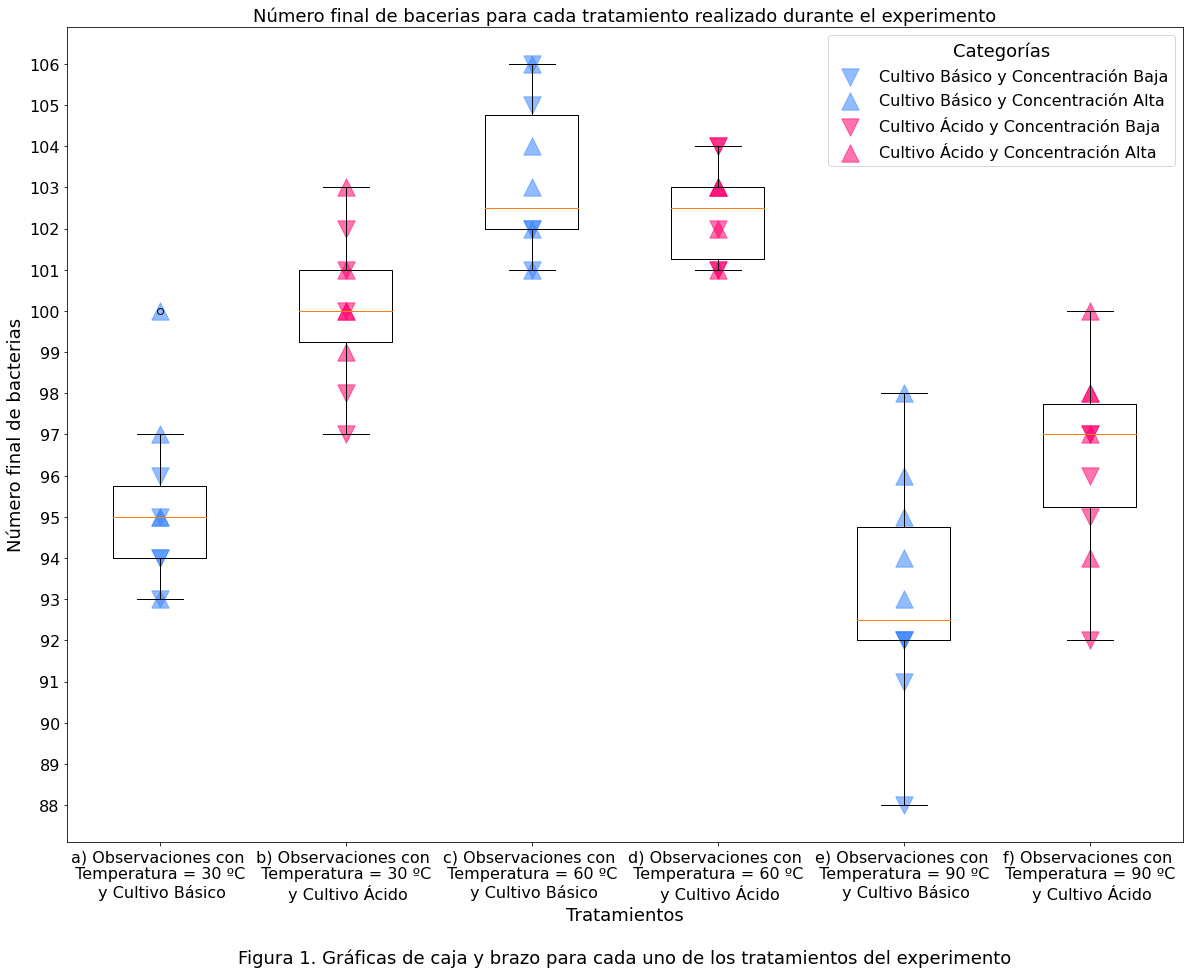

In [10]:
temperaturas = df["Temperatura [ºC]"].unique()

colors = {"Básico": "#3a86ff",
          "Ácido": "#ff006e"}
n = len(colors)

markers = {"Baja": "v",
           "Alta": "^"}

# Tamaños de fuente
big = 18
small = 16

s = 300

data = []
ticks = []
ticks_labels = []

panel_id = [["a) ", "b) "], ["c) ", "d) "], ["e) ", "f) "]]

plt.figure(figsize = (20, 15))

for i, temperatura in enumerate(temperaturas):
    for j, (cultivo, color) in enumerate(colors.items()):
        # Construir datos para boxplots
        matching_indices_box_plot = (df["Temperatura [ºC]"] == temperatura) & (df["Cultivo"] == cultivo)
        data.append(df.loc[matching_indices_box_plot, y].to_list())
        
        tick_label = panel_id[i][j] + f"Observaciones con \n Temperatura = {temperatura} ºC \n y Cultivo {cultivo}"
        ticks_labels.append(tick_label)
        
        current_panel = n*i + j + 1
        
        # Incluir los puntos en cada boxplot
        for concentracion, marker in markers.items():
            matching_indices_scatter_plot = matching_indices_box_plot & (df["Concentración"] == concentracion)
            
            if current_panel <= 2: # Para que no se repitan en el legend
                label = f"Cultivo {cultivo} y Concentración {concentracion}"
            else:
                label = ""
                
            plt.scatter([current_panel for i in range(0,len(df[matching_indices_scatter_plot].index))], 
                        df.loc[matching_indices_scatter_plot, y], 
                        c = color, 
                        marker = marker,
                        s = s, 
                        alpha = 0.55,
                        label = label)

plt.boxplot(data)
plt.legend(fontsize=small, title="Categorías", title_fontsize=big)
plt.xticks(range(1, len(data)+1), ticks_labels)
plt.yticks(range(88, 107))
plt.tick_params(axis = 'both', which = 'major', labelsize = small)
plt.xlabel("Tratamientos\n\nFigura 1. Gráficas de caja y brazo para cada uno de los tratamientos del experimento",fontsize=big)
plt.ylabel(y, fontsize=big)
plt.title("Número final de bacerias para cada tratamiento realizado durante el experimento", fontsize=big)
plt.show()

##### `Temperatura` de 30 ºC

En las gráficas de caja y brazo a) y b) de la Figura 1 se encuentran los resultados correspondientes a los tratamientos con `Cultivo` Básico y Ácido, respectivamente, para un valor de `Temperatura` de 30 ºC. Uniendo los resultados de ambos tipos de `Cultivo` para los tratamientos con un valor de `Temperatura` de 30 ºC, el `Número final de bacterias` se encuentra entre 93 y 103 unidades y tiene un valor medio de 97.65.

En este caso la mediana del `Número final de bacterias` tuvo un incremento de 95 a 100 al pasar de un `Cultivo` Básico a un `Cultivo` Ácido.



##### `Temperatura` de 60 ºC

En las gráficas de caja y brazo c) y d) de la Figura 1 se encuentran los resultados correspondientes a los tratamientos con `Cultivo` Básico y Ácido, respectivamente, para un valor de `Temperatura` de 60 ºC. Uniendo los resultados de ambos tipos de `Cultivo` para los tratamientos con un valor de `Temperatura` de 60 ºC, el `Número final de bacterias` se encuentra entre 101 y 106 unidades y tiene un valor medio de 102.8.

En este caso la mediana del `Número final de bacterias` no tuvo cambio al pasar de un `Cultivo` Básico a un `Cultivo` Ácido.



##### `Temperatura` de 90 ºC

En las gráficas de caja y brazo e) y f) de la Figura 1 se encuentran los resultados correspondientes a los tratamientos con `Cultivo` Básico y Ácido, respectivamente, para un valor de `Temperatura` de 90 ºC. Uniendo los resultados de ambos tipos de `Cultivo` para los tratamientos con un valor de `Temperatura` de 90 ºC, el `Número final de bacterias` se encuentra entre 88 y 100 unidades y tiene un valor medio de 94.75.

En este caso la mediana del `Número final de bacterias` tuvo un incremento de 92.5 a 97 al pasar de un `Cultivo` Básico a un `Cultivo` Ácido.

##### Comentarios generales
El análisis anterior sugiere que el `Número final de bacterias` varía dependiendo de la `Temperatura` en el sentido de que el `Número final de bacterias` tiende a ser mayor si la `Temperatura` es de 60 ºC, menor si es de 30 ºC y aún menor si es de 90 ºC.

Para los niveles de `Temperatura` de 30 ºC y 90 ºC, el `Número final de bacterias` tiende a aumentar si el tipo de `Cultivo` cambia de Básico a Ácido. Esto sugiere que el tipo de `Cultivo` influye sobre el `Número final de bacterias` al menos para estos dos casos. La relación entre `Cultivo` y `Número final de bacterias` no es del todo clara para el caso de una `Temperatura` de 60 ºC.

La situación es ambigua con respecto a los niveles de `Concentración` ya que, para casi todos los tratamientos, es posible encontrar observaciones con niveles de `Concentración` tanto Baja como Alta en ambos brazos de las gráficas de caja y brazo. Esto sugiere que el nivel de `Concentración`no tiene una gran influencia sobre el `Número final de bacterias`.

# 2. ¿Puede considerar que hay diferencia entre los niveles medios de temperatura? Esto es, identifica efectos sobre el número de bacterias por cambio en los niveles de temperatura?

In [11]:
# Obtener variables indicadoras para cada variable categórica

# Abreviar los nombres de las columnas categóricas
abbreviations = ["t", "k", "c"]

x = [] # Lista para almacenar los nombres de las variables indicadoras generadas

for category, abbreviation in zip(categorical, abbreviations):
    values = df[category].unique() # Valores distintos de la categoría actual
    n = len(values) # Cantidad de valores distintos de la categoría actual
    
    for k, value in enumerate(values):
        matching_rows = (df[category] == value) # Filas correspondientes al valor actual de la categoría actual
        
        # Si la variable categórica tiene n valores se necesitan n-1 variables indicadoras
        levels = f"{{:0{n-1}b}}".format(k)[::-1] # Código binario con los valores de cada variable indicadora
        
        for j in range(n-1): # Asignar valores a las variables indicadoras
            # Nombre de la variable indicadora
            label = fr"${{{abbreviation}}}_{j+1}$" if n > 2 else fr"${{{abbreviation}}}$" 
            
            x.append(label) # Agregar indicadora a la lista
            
            df.loc[matching_rows, label] = int(levels[j])

import collections
x = list(collections.OrderedDict.fromkeys(x)) # Quitar duplicados manteniendo el orden

In [12]:
# Obtener interacciones entre las variables indicadoras

import itertools
combinations = list(itertools.combinations(x, 2))

for combination in combinations:
    if combination != ('${t}_1$', '${t}_2$'): # Incluir esta combinación ocasiona singularidad
        # label = f"Interacción {combination[0]} y {combination[1]}"
        label = fr"{combination[0]}{combination[1]}"
        x.append(label) # Agregar interacciones a la lista
    
        df[label] = df[combination[0]]*df[combination[1]]

Para responder a esta pregunta y a las siguientes cuatro, se propone el siguiente modelo de regresión lineal.

$$y = \beta_0 + \beta_1t_1 + \beta_2t_2 + \beta_3k + \beta_4c + \beta_5t_1k + \beta_6t_1c + \beta_7t_2k + \beta_8t_2c + \beta_9kc + \varepsilon$$

donde
* $y$ es la variable respuesta correspondiente al `Número final de bacterias`.
* $t_1$ y $t_2$ son los regresores correspondientes a las variables indicadoras asociadas con el nivel de`Temperatura`, donde
$$
(t_1,\,t_2) = 
\begin{cases}
(0,\,0) & \text{ si } \textsf{Temperatura} = 30 \text{ ºC} \\
(1,\,0) & \text{ si } \textsf{Temperatura} = 60 \text{ ºC} \\
(0,\,1) & \text{ si } \textsf{Temperatura} = 90 \text{ ºC} \\
\end{cases}
$$
* $k$ es el regresor correspondiente a la variable indicadora asociada con el tipo de`Cultivo`, donde
$$
k = 
\begin{cases}
0 & \text{ si } \textsf{Cultivo} = \text{Básico} \\
1 & \text{ si } \textsf{Cultivo} = \text{Ácido} \\
\end{cases}
$$
* $c$ es el regresor correspondiente a la variable indicadora asociada con el nivel de`Concentración`, donde
$$
c = 
\begin{cases}
0 & \text{ si } \textsf{Concentración} = \text{Baja} \\
1 & \text{ si } \textsf{Concentración} = \text{Alta} \\
\end{cases}
$$
* $\varepsilon$ es el término de error aleatorio.

Es importante resaltar que se pueden obtener 12 modelos diferentes como resultado de las distintas combinaciones de niveles de `Temperatura`, `Cultivo` y `Concentración`.

In [13]:
# QUITAR SI OCUPA MUCHO ESPACIO.

from IPython.display import display, Markdown, Latex

modelos = pd.read_csv("modelos.csv")

for index, row in modelos.iterrows():
    
    temperatura = row["Temperatura [ºC]"]
    cultivo = row["Cultivo"]
    concentracion = row["Concentración"]
    t_1 = row["${t}_1$"]
    t_2 = row["${t}_2$"]
    k = row["${k}$"]
    c = row["${c}$"]
    modelo = row["Modelo"]
    
    descripcion = f"Para las observaciones obtenidas con una `Temperatura` de {temperatura} ºC, " \
                  fr"con `Cultivo` {cultivo} y con `Concentración` {concentracion} " \
                  fr"se tienen $t_1 = {{{t_1}}}$, $t_2 = {{{t_2}}}$, $k = {{{k}}}$ y $c = {{{c}}}$. " \
                  f"Entonces, el modelo para este tratamiento es: "
    display(Markdown(descripcion + modelo))
    #display(Latex(modelo))
    print("\n")

Para las observaciones obtenidas con una `Temperatura` de 30 ºC, con `Cultivo` Básico y con `Concentración` Baja se tienen $t_1 = {0}$, $t_2 = {0}$, $k = {0}$ y $c = {0}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 30 ºC, con `Cultivo` Básico y con `Concentración` Alta se tienen $t_1 = {0}$, $t_2 = {0}$, $k = {0}$ y $c = {1}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_4 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 30 ºC, con `Cultivo` Ácido y con `Concentración` Baja se tienen $t_1 = {0}$, $t_2 = {0}$, $k = {1}$ y $c = {0}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_3 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 30 ºC, con `Cultivo` Ácido y con `Concentración` Alta se tienen $t_1 = {0}$, $t_2 = {0}$, $k = {1}$ y $c = {1}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_3 + \beta_4 + \beta_9 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 60 ºC, con `Cultivo` Básico y con `Concentración` Baja se tienen $t_1 = {1}$, $t_2 = {0}$, $k = {0}$ y $c = {0}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_1 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 60 ºC, con `Cultivo` Básico y con `Concentración` Alta se tienen $t_1 = {1}$, $t_2 = {0}$, $k = {0}$ y $c = {1}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_1 + \beta_4 + \beta_6 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 60 ºC, con `Cultivo` Ácido y con `Concentración` Baja se tienen $t_1 = {1}$, $t_2 = {0}$, $k = {1}$ y $c = {0}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_1 + \beta_3 + \beta_5 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 60 ºC, con `Cultivo` Ácido y con `Concentración` Alta se tienen $t_1 = {1}$, $t_2 = {0}$, $k = {1}$ y $c = {1}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_1 + \beta_3 + \beta_4 + \beta_5 + \beta_6 + \beta_9 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 90 ºC, con `Cultivo` Básico y con `Concentración` Baja se tienen $t_1 = {0}$, $t_2 = {1}$, $k = {0}$ y $c = {0}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_2 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 90 ºC, con `Cultivo` Básico y con `Concentración` Alta se tienen $t_1 = {0}$, $t_2 = {1}$, $k = {0}$ y $c = {1}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_2 + \beta_4 + \beta_8 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 90 ºC, con `Cultivo` Ácido y con `Concentración` Baja se tienen $t_1 = {0}$, $t_2 = {1}$, $k = {1}$ y $c = {0}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_2 + \beta_3 + \beta_7 + \varepsilon$

Para las observaciones obtenidas con una `Temperatura` de 90 ºC, con `Cultivo` Ácido y con `Concentración` Alta se tienen $t_1 = {0}$, $t_2 = {1}$, $k = {1}$ y $c = {1}$. Entonces, el modelo para este tratamiento es: $y = \beta_0 + \beta_2 + \beta_3 + \beta_4 + \beta_7 + \beta_8 + \beta_9 + \varepsilon$

In [14]:
# ESTA INTERPRETACIÓN SÍ ES MUY IMPORTANTE PORQUE LE DA VALIDEZ A LAS RESPUESTAS DE ESTA Y LAS SIGUIENTES PREGUNTAS.

De modo que,
* El parámetro $\beta_0$ es el valor medio del `Número final de bacterias` para un nivel de `Temperatura` de 30 ºC con un tipo de `Cultivo` Básico y con `Concentración` Baja.
* El parámetro $\beta_1$ es una medida del cambio en el `Número final de bacterias` al pasar de una `Temperatura` de 30 ºC a una `Temperatura` de 60 ºC.
* El parámetro $\beta_2$ es una medida del cambio en el `Número final de bacterias` al pasar de una `Temperatura` de 30 ºC a una `Temperatura` de 90 ºC. Entonces, la cantidad $\beta_2$ - $\beta_1$ es una medida del cambio en el `Número final de bacterias` al pasar de una `Temperatura` de 60 ºC a una `Temperatura` de 90 ºC.
* El parámetro $\beta_3$ es una medida del cambio en el `Número final de bacterias` al pasar de un `Cultivo` Básico a un `Cultivo` Ácido cuando la `Temperatura` es de 30 ºC.
* El parámetro $\beta_4$ es una medida del cambio en el `Número final de bacterias` al pasar de una `Concentración` Baja a una `Concentración` Alta cuando la `Temperatura` es de 30 ºC.
* El parámetro $\beta_5$ mide la interacción entre los regresores $t_1$ y $k$. La cantidad $\beta_3 + \beta_5$ es una medida del cambio en el `Número final de bacterias` al pasar de un `Cultivo` Básico a un `Cultivo` Ácido cuando la `Temperatura` es de 60 ºC.
* El parámetro $\beta_6$ mide la interacción entre los regresores $t_1$ y $c$. La cantidad $\beta_4 + \beta_6$ es una medida del cambio en el `Número final de bacterias` al pasar de una `Concentración` Baja a una `Concentración` Alta cuando la `Temperatura` es de 60 ºC.
* El parámetro $\beta_7$ mide la interacción entre los regresores $t_2$ y $k$. La cantidad $\beta_3 + \beta_7$ es una medida del cambio en el `Número final de bacterias` al pasar de un `Cultivo` Básico a un `Cultivo` Ácido cuando la `Temperatura` es de 90 ºC.
* El parámetro $\beta_8$ mide la interacción entre los regresores $t_2$ y $c$. La cantidad $\beta_4 + \beta_8$ es una medida del cambio en el `Número final de bacterias` al pasar de una `Concentración` Baja a una `Concentración` Alta cuando la `Temperatura` es de 90 ºC.
* El parámetro $\beta_9$ mide la interacción entre los regresores $k$ y $c$. La cantidad $\beta_9$ es un ajuste en el `Número final de bacterias` cuando el tipo de `Cultivo` es Ácido y la `Concentración` es Alta.


In [31]:
# OBTENER EL AJUSTE Y MOSTRARLO.
n = len(df.index)
k = len(x)
p = k + 1
m = len(df.drop_duplicates(subset=x).index)

ones = np.ones((n, 1))
X =  np.c_[ones, df[x].to_numpy()]

Y = df[y].to_numpy()

C = np.linalg.inv(np.dot(X.T, X))

beta = np.linalg.multi_dot([C, X.T, Y])

Y_fit = np.dot(X, beta)
df["Respuesta ajustada"] = Y_fit

residuals = Y - Y_fit
df["Residuales"] = residuals

def to_string(beta, x):
    regressors = [""]
    signs = []
    betas = []
    beta_first = True
    
    for value in beta:
        if value > 0:
            if beta_first:
                signs.append("")
            else:
                signs.append("+")
        else:
            signs.append("-")
        betas.append(str(abs(np.round(value,2))))
        beta_first = False

    for value in x:
        regressors.append(value)

    string = r"$\hat{y}$" + " ="
    for sign, coefficient, regressor in zip(signs, betas, regressors):
        string = string + f" {sign} {coefficient}{regressor}"

    return string

display(Markdown("El ajuste obtenido para el modelo propuesto está dado por"))
# display(Latex(to_string(beta, x))) # NO SÉ POR QUÉ NO SALE CENTRADO :(
# display(Markdown(to_string(beta,x)))
display(Markdown('$\hat{y}$ =  94.32 + 8.65${t}_1$ - 3.0${t}_2$ + 5.37${k}$ + 1.77${c}$ - 5.7${t}_1{k}$ - 1.3${t}_1{c}$ - 1.6${t}_2{k}$ + 1.8${t}_2{c}$ - 0.93${k}{c}$'))

El ajuste obtenido para el modelo propuesto está dado por

$\hat{y}$ =  94.32 + 8.65${t}_1$ - 3.0${t}_2$ + 5.37${k}$ + 1.77${c}$ - 5.7${t}_1{k}$ - 1.3${t}_1{c}$ - 1.6${t}_2{k}$ + 1.8${t}_2{c}$ - 0.93${k}{c}$

In [16]:
# MOSTRAR R^2 Y R^2 AJUSTADA.

SS_Res = np.sum((Y - Y_fit)**2)
MS_Res = SS_Res/(n - p)

Y_mean = np.repeat(Y.mean(), n)
SS_Tot = np.sum((Y - Y_mean)**2)

# SS_R = np.sum((Y_fit - Y_mean)**2)
# MS_R = SS_R/k

R_sq = np.round(100*(1 - SS_Res/SS_Tot),2)
R_sq_adj = np.round(100*(1 - ((SS_Res)/(n - p))/((SS_Tot)/(n - 1))),2)

#mensaje = fr"Para el ajuste obtenido se calculó un valor de $R^2$ de {R_sq} % " 
#mensaje = mensaje + r"y un valor de $R^2_{\text{ajustada}}$" + f" de {R_sq_adj} %. "
#mensaje = mensaje + "Esto quiere decir que los regresores incluidos en el modelo"
#mensaje = mensaje + "logran explicar una cantidad suficiente de la variabilidad de la respuesta."

mensaje = fr"Para el ajuste obtenido se calculó un valor de $R^2$ de {R_sq} % " + \
r"y un valor de $R^2_{\text{ajustada}}$" + f" de {R_sq_adj} %. " + \
"Esto quiere decir que los regresores incluidos en el modelo logran " + \
"explicar una cantidad suficiente de la variabilidad de la respuesta."

display(Markdown(mensaje))

Para el ajuste obtenido se calculó un valor de $R^2$ de 83.99 % y un valor de $R^2_{\text{ajustada}}$ de 81.11 %. Esto quiere decir que los regresores incluidos en el modelo logran explicar una cantidad suficiente de la variabilidad de la respuesta.

In [17]:
# COMPLEMENTO SI QUEDA ESPACIO/TIEMPO: PRUEBA DE FALTA DE AJUSTE, QUE ES INDEPENDIENTE DEL MODELO

A continuación se realizan algunas pruebas de hipótesis para análizar los efectos de los cambios de `Temperatura` sobre el `Número final de bacterias`.

In [18]:
# PARA RESPONDER A LA PREGUNTA 2, PROBAR
    # H_0: \beta_1 = 0 vs. H_1: \beta_1 \neq 0. RECHAZAR SI p < alpha.
    # H_0: \beta_1 = 0 vs. H_1: \beta_1 \neq 0. RECHAZAR SI p < alpha.
    # H_0: \beta_2 = 0 vs. H_1: \beta_2 \neq 0. RECHAZAR SI p < alpha.

# AL RECHAZAR ESTAS HIPÓTESIS SE PRUEBA QUE LA TEMPERATURA SÍ INFLUYE EN EL NÚMERO FINAL DE BACTERIAS

# Para darle formato a los valores p
def format_tex(float_number):
    if float_number == 0:
        mantissa_format = 1.11
        exponent = -16
    else:
        exponent = np.floor(np.log10(float_number))
        mantissa = float_number/10**exponent
        mantissa_format = str(mantissa)[0:4]
    return fr"{mantissa_format} $\times$ 10 $^{{{int(exponent)}}}$"

# Para probar H_0: \beta_j = beta_j^0 vs H_1: \beta_j \neq beta_j^0
def test_beta(j, beta_0 = 0, alpha = 0.05):
    beta_j = beta[j]
    C_jj = np.diag(C)[j]
    std_error = np.sqrt(MS_Res*C_jj)
    t_0 = (beta_j - beta_0)/(std_error)
    p_value = stats.t.cdf(-abs(t_0), n - p) + 1-stats.t.cdf(abs(t_0), n - p)
    
    pretty_t_0 = np.round(t_0,2)
    pretty_p_value = format_tex(p_value)
    
    mensaje = fr"Para la prueba de hipótesis $H_0$: $\beta_{j}$ = {beta_0} vs. $H_1$: $\beta_{j}$ $\neq$ {beta_0} " + \
    fr" se obtuvo un estadístico $t_0$ = {pretty_t_0} y un resultante valor $p$ = {pretty_p_value}"
    
    if p_value < alpha:
        complemento = r", que es lo suficientemente pequeño como para rechazar la hipótesis $H_0$."
    else:
        complemento = r", que es lo suficientemente grande como para no rechazar la hipótesis $H_0$."
    
    display(Markdown(mensaje + complemento))
    
    return t_0, p_value

t_0, p_value = test_beta(0)
t_0, p_value = test_beta(1)
t_0, p_value = test_beta(2)

Para la prueba de hipótesis $H_0$: $\beta_0$ = 0 vs. $H_1$: $\beta_0$ $\neq$ 0  se obtuvo un estadístico $t_0$ = 124.55 y un resultante valor $p$ = 1.11 $\times$ 10 $^{-16}$, que es lo suficientemente pequeño como para rechazar la hipótesis $H_0$.

Para la prueba de hipótesis $H_0$: $\beta_1$ = 0 vs. $H_1$: $\beta_1$ $\neq$ 0  se obtuvo un estadístico $t_0$ = 8.51 y un resultante valor $p$ = 2.69 $\times$ 10 $^{-11}$, que es lo suficientemente pequeño como para rechazar la hipótesis $H_0$.

Para la prueba de hipótesis $H_0$: $\beta_2$ = 0 vs. $H_1$: $\beta_2$ $\neq$ 0  se obtuvo un estadístico $t_0$ = -2.95 y un resultante valor $p$ = 4.78 $\times$ 10 $^{-3}$, que es lo suficientemente pequeño como para rechazar la hipótesis $H_0$.

De acuerdo con los resultados de las pruebas de hipótesis anteriores, es posible afirmar que no hay evidencia de que los coeficientes asociados con los cambios de `Temperatura` sean negligibles y, por lo tanto, es posible concluir que los efectos sobre el `Número final de bacterias` por cambio en los niveles de `Temperatura` sí son identificables.

# 3. ¿Es distinta la respuesta dependiendo del cultivo empleado?

In [33]:
# PARA RESPONDER A LA PREGUNTA 3, PROBAR
    # H_0: \beta_3 = 0 vs. H_1: \beta_3 \neq 0. RECHAZAR SI p < alpha.

t_0, p_value = test_beta(3)

# AL RECHAZAR ESTA HIPÓTESIS SE PRUEBA QUE EL TIPO DE CULTIVO SÍ INFLUYE EN EL NÚMERO FINAL DE BACTERIAS

Para la prueba de hipótesis $H_0$: $\beta_3$ = 0 vs. $H_1$: $\beta_3$ $\neq$ 0  se obtuvo un estadístico $t_0$ = 5.6 y un resultante valor $p$ = 9.00 $\times$ 10 $^{-7}$, que es lo suficientemente pequeño como para rechazar la hipótesis $H_0$.

Como rechazamos la opción que $\beta_3$ tome el valor de cero, esto implica que el tipo de cultivo que se emplea en las muestras sí afecta o sí tiene un impacto significativo en el número de bacterias encontradas.

# 4. ¿Consideraría que los factores interactúan?

A continuación se harán varias pruebas de hipótesis que ayudarán a discernir si los distintos factores (`Temperatura`, `Cultivo` y `Concentración`) interactúan entre ellos en el resultado final de número de bacterias.

In [20]:
# PARA RESPONDER A LA PREGUNTA 4, PROBAR
    # H_0: \beta_5 = 0 vs. H_1: \beta_5 \neq 0. RECHAZAR SI p < alpha.
    # H_0: \beta_6 = 0 vs. H_1: \beta_6 \neq 0. RECHAZAR SI p < alpha.
    # H_0: \beta_7 = 0 vs. H_1: \beta_7 \neq 0. RECHAZAR SI p < alpha.
    # H_0: \beta_8 = 0 vs. H_1: \beta_8 \neq 0. RECHAZAR SI p < alpha.
    # H_0: \beta_9 = 0 vs. H_1: \beta_9 \neq 0. RECHAZAR SI p < alpha.

# INDICAR CUÁLES FACTORES INTERACTÚAN Y CUÁLES NO 
# DEPENDIENDO DE CUÁLES HIPÓTESIS SE RECHACEN Y CUÁLES NO, RESPECTIVAMENTE.

In [34]:
t_0, p_value = test_beta(5)
t_0, p_value = test_beta(6)
t_0, p_value = test_beta(7)
t_0, p_value = test_beta(8)
t_0, p_value = test_beta(9)

Para la prueba de hipótesis $H_0$: $\beta_5$ = 0 vs. $H_1$: $\beta_5$ $\neq$ 0  se obtuvo un estadístico $t_0$ = -4.86 y un resultante valor $p$ = 1.20 $\times$ 10 $^{-5}$, que es lo suficientemente pequeño como para rechazar la hipótesis $H_0$.

Para la prueba de hipótesis $H_0$: $\beta_6$ = 0 vs. $H_1$: $\beta_6$ $\neq$ 0  se obtuvo un estadístico $t_0$ = -1.11 y un resultante valor $p$ = 2.73 $\times$ 10 $^{-1}$, que es lo suficientemente grande como para no rechazar la hipótesis $H_0$.

Para la prueba de hipótesis $H_0$: $\beta_7$ = 0 vs. $H_1$: $\beta_7$ $\neq$ 0  se obtuvo un estadístico $t_0$ = -1.36 y un resultante valor $p$ = 1.78 $\times$ 10 $^{-1}$, que es lo suficientemente grande como para no rechazar la hipótesis $H_0$.

Para la prueba de hipótesis $H_0$: $\beta_8$ = 0 vs. $H_1$: $\beta_8$ $\neq$ 0  se obtuvo un estadístico $t_0$ = 1.53 y un resultante valor $p$ = 1.31 $\times$ 10 $^{-1}$, que es lo suficientemente grande como para no rechazar la hipótesis $H_0$.

Para la prueba de hipótesis $H_0$: $\beta_9$ = 0 vs. $H_1$: $\beta_9$ $\neq$ 0  se obtuvo un estadístico $t_0$ = -0.97 y un resultante valor $p$ = 3.34 $\times$ 10 $^{-1}$, que es lo suficientemente grande como para no rechazar la hipótesis $H_0$.

Como podemos observar, todos los valores p de las pruebas de hipótesis son valores grandes, con excepción del valor de la prueba para $\beta_5$. Esto quiere decir que las únicas variables que interactúan entre ellas de manera significativa son `Temperatura` y `Cultivo`.

# 5. Valide su modelo mediante el análisis de los residuales.

In [21]:
# GRÁFICA DE RESIDUALES CONTRA RESPUESTAS AJUSTADAS
# GRÁFICA CUANTIL CUANTIL DE LOS RESIDUALES
# VER SI SE SATISFACE EL SUPUESTO DE NORMALIDAD
# COMPLEMENTOS SI QUEDA ESPACIO/TIEMPO: RESIDUALES ESTANDARIZADOS/STUDENTIZADOS CP DE MALLOWS

# 6. ¿Considera que es necesario distinguir entre los niveles bajo y alto de la concentración del cultivo?

In [22]:
# PARA RESPONDER A LA PREGUNTA 6, PROBAR
    # H_0: \beta_4 = 0 vs. H_1: \beta_4 \neq 0. RECHAZAR SI p < alpha.

# AL RECHAZAR ESTA HIPÓTESIS SE PRUEBA QUE EL NIVEL DE CONCENTRACIÓN SÍ INFLUYE EN EL NÚMERO FINAL DE BACTERIAS

# 7. Concluya el reporte resaltando lo encontrado en su análisis.

In [23]:
# DAR INTERVALOS DE CONFIANZA DE LA RESPUESTA MEDIA PARA CADA TRATAMIENTO.
# POR EJEMPLO, EL INTERVALO DE 95% DE CONFIANZA PARA LA RESPUESTA MEDIA SI X_0 = (1, 0, 1, 1, 0, 0, 0, 1, 0, 0 )
# CORRESPONDE A LA CANTIDAD DE BACTERIAS ESPERADA SI 90ºC, ÁCIDO, BAJA (EL PRIMER 1 ES EL INTERCEPT)

# COMENTAR SI COINCIDE CON LO QUE SE ESPERARÍA A PARTIR DEL BOXPLOT.

In [24]:
# COMPLEMENTOS SI QUEDA ESPACIO/TIEMPO: 
# UTILIZAR SUMA DE CUADRADOS EXTRA PARA VER SI SE PODRÍAN ELIMINAR ALGUNAS INTERACCIONES

# Conclusiones